# Numerical Simulation of the Weibel Instability in One and Two Dimensions

R. L. Morse and C. W. Nielsen

*Los Alamos Scientific Laboratory, University of California, Los Alamos, New Mexico 87544*

The Physics of Fluids, Volume 14, Number 4, April 1971

[DOI: 10.1063/1.1693518](https://doi.org/10.1063/1.1693518)

In this notebook we reproduce the 1D simulations presented by Morse and Nielsen in their seminal paper of 1971. In this paper they explore the development of the Weibel instability, by initializing a single species with a temperature anisotropy.

Specifically, a uniform density electron species is initialized with $u_{thx} = 0.05 \,\rm{c}$ and $u_{thy} = 0.25 \,\rm{c}$. We use the same simulation parameters as the paper, but increase the resolution by a factor of 3 to have more detail on the phase-space plots, which gives 150 cells and a cell size $\Delta x = 0.1 \,c \omega_p^{-1}$, with $3 \times 10^4$ particles.

Also note that we 

In [1]:
import em1ds as zpic
import numpy as np
import matplotlib.pyplot as plt

# Thermal velocity
uth = [0.05,0.25,0.0]

electrons = zpic.Species( "electrons", -1.0, 200, uth = uth )

sim = zpic.Simulation( 150, box = 15.0, dt = 0.08, species = electrons )


## Phasespace Analysis

The plots in the original paper distiguish particles in 3 groups according to their initial $u_y$ value: the first group holds the 1/4 of particles that is closest to the minimum $u_y$ injected, the second group holds the 1/2 of particles that is closest to $u_y = 0$ and the third group holds the 1/4 of particles that is closest to the maximum $u_y$ injected. To reproduce this, we turn off particle sorting (so the particles will retain their initial indexes) and store the indexes of the particles belonging to each of the groups: 

In [2]:
# Disables sorting
electrons.n_sort = 0

# Selects particle groups for visualization
uy = electrons.particles['uy']

lim = uth[1] * 0.67449

idxa =  uy <= -lim 
idxb = (uy >  -lim ) & (uy < lim )
idxc =  uy >=  lim 

For simplicity we define a routine to generate a side-by-side plot of the particle phasespace, with particles divided into 3 groups as described above, and the magnetic field along the z direction, $B_z$, like the plots in Fig. 3 of the paper:

In [3]:
# Routine for generating plots
def vis( sim ):
    f, (ax1,ax2) = plt.subplots(ncols = 2, sharey=True)
    f.set_size_inches(8,6)
    
    # Phasespace plot
    x = ( electrons.particles['ix'] + electrons.particles['x']) * electrons.dx 
    ux = electrons.particles['ux']

    ax1.plot( ux[idxa] - 1, x[idxa], '.', ms=1,alpha=0.4, label = "$u_x^L - 1$")
    ax1.plot( ux[idxb]    , x[idxb], '.', ms=1,alpha=0.4, label = "$u_x^C$")
    ax1.plot( ux[idxc] + 1, x[idxc], '.', ms=1,alpha=0.4, label = "$u_x^R + 1$")

    ax1.set_xlabel("$u_x$ [$m_e c$]")
    ax1.set_title("$u_x - x$ phasespace")
    ax1.legend()
    ax1.grid(True)

    ax1.set_ylabel("$x$ [$c\,\omega_n^{-1}$]")

    # Magnetic field plot
    ax2.plot( sim.emf.Bz, np.linspace(0, sim.box, num = sim.nx), label = "$B_z$")
    ax2.set_xlim(left=-0.15,right=0.15)
    ax2.grid(True)
    ax2.set_xlabel("$B_Z$ field []")
    ax2.set_title("Magnetic Field")
    ax2.legend()
    
    f.suptitle("t = {:g}".format(sim.t) + " $\omega_p^{-1}$")
    plt.show()

We now run the simulation until the specified times and visualize results for each one:


Running simulation up to t = 30 ...
n = 376, t = 30.08
Done.


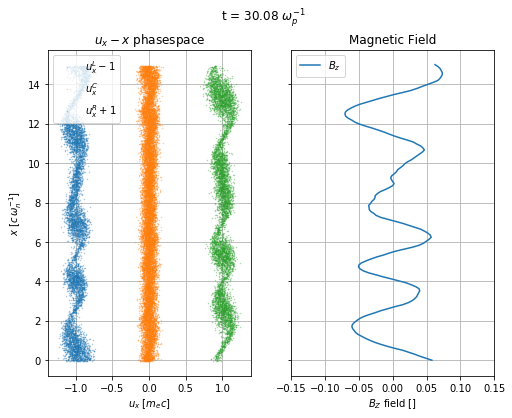

In [4]:
sim.run(30.0)
vis(sim)


Running simulation up to t = 40 ...
n = 501, t = 40.08
Done.


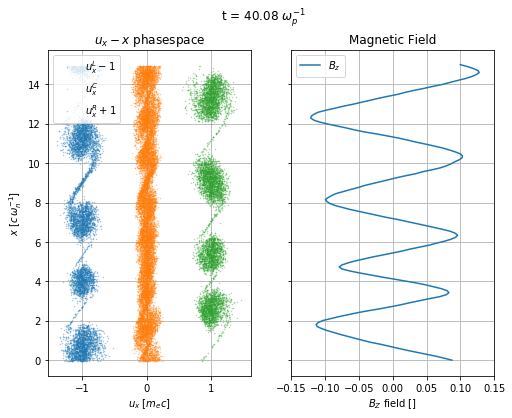

In [5]:
sim.run(40.0)
vis(sim)


Running simulation up to t = 50 ...
n = 626, t = 50.08
Done.


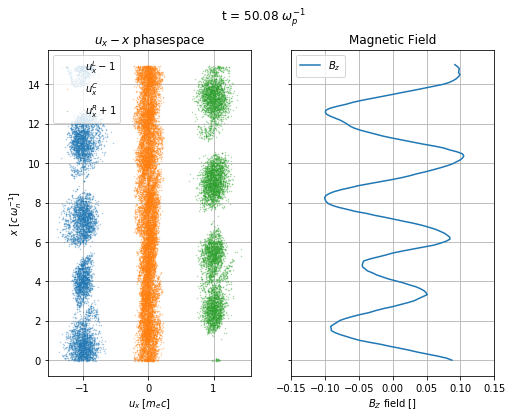

In [6]:
sim.run(50.0)
vis(sim)


Running simulation up to t = 100 ...
n = 1251, t = 100.08
Done.


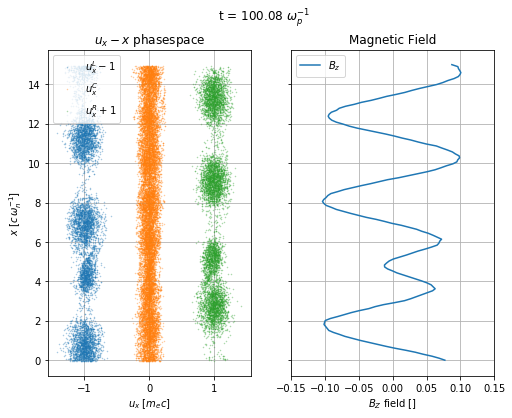

In [7]:
sim.run(100.0)
vis(sim)


Running simulation up to t = 200 ...
n = 2501, t = 200.08
Done.


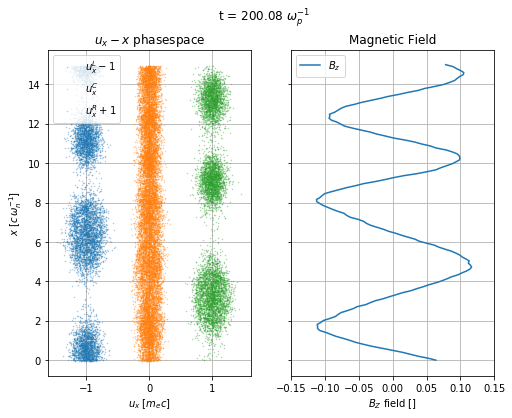

In [8]:
sim.run(200.0)
vis(sim)


Running simulation up to t = 400 ...
n = 5001, t = 400.08
Done.


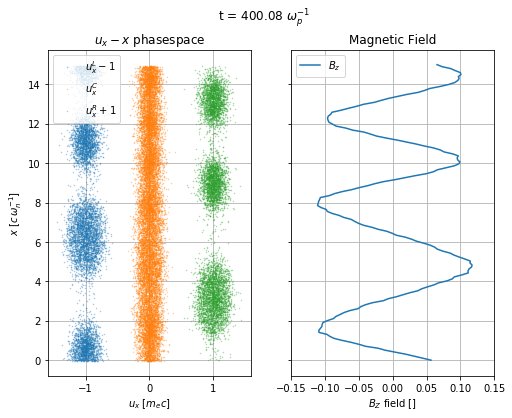

In [9]:
sim.run(400.0)
vis(sim)

## Field Energy Evolution

To recreate the plot showing the evolution of the field energy (Fig.4) we rerun the simulation storing the energy values for all time-steps. The initialization is the same as before:

In [10]:
electrons = zpic.Species( "electrons", -1.0, 1000, uth = [0.05,0.25,0.0] )

sim = zpic.Simulation( 150, box = 15.0, dt = 0.08, species = electrons )

To store the field energy we run the simulation with a customized loop to store these values at every time-step:

In [11]:
import math

tmax = 400

niter = int(math.ceil(tmax / sim.dt))

EneB = np.zeros(niter)
EneE = np.zeros(niter)
norm = 0.5 * sim.emf.nx * sim.box / sim.nx

print("\nRunning simulation up to t = {:g} ...".format(tmax))
while sim.t < tmax:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    EneB[sim.n] = np.sum(sim.emf.Bx**2+sim.emf.By**2+sim.emf.Bz**2) * norm
    EneE[sim.n] = np.sum(sim.emf.Ex**2+sim.emf.Ey**2+sim.emf.Ez**2) * norm

    sim.iter()

print("\nDone.")



Running simulation up to t = 400 ...
n = 4999, t = 399.92
Done.


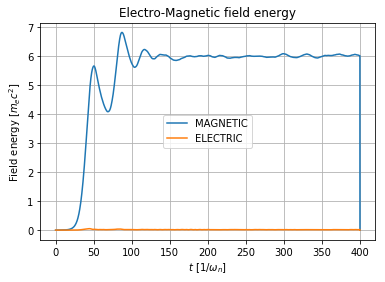

In [13]:
plt.plot(np.linspace(0, sim.t, num = niter),EneB, label = "MAGNETIC")
plt.plot(np.linspace(0, sim.t, num = niter),EneE, label = "ELECTRIC")

#plt.yscale('log')
#plt.ylim(ymin=0.01)
plt.grid(True)
plt.xlabel("$t$ [$1/\omega_n$]")
plt.ylabel("Field energy [$m_e c^2$]")
plt.title("Electro-Magnetic field energy")
plt.legend()
plt.show()

As shown in the paper, the energy lies almost exclusively in the magnetic field. The plot also clearly shows the linear stage of the instability as well as the saturation fase. We see mulitple local maxima in the magnetic field energy that are associated with the coalescence of the trapped particles. However, we cannot fully reproduce the multiple local maxima shown in the original paper, nor the continuous growth in energy following the saturation of the instability (which is most likely due to self e.